In [1]:
import numpy as np
import matplotlib.pyplot as pl
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
X = np.load("digit_data/X.npy")
y = np.load("digit_data/y.npy")
X = X[0:1000]
y = y[0:1000]
print(X.shape)
print(X[0])

(1000, 400)
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e

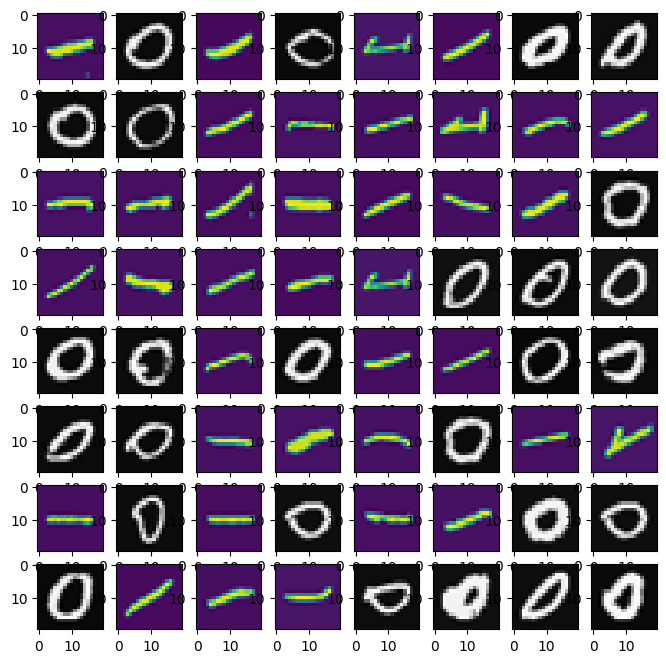

In [3]:
fig,ax = pl.subplots(8,8,figsize=(8,8))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        r = random.randint(1,1000)
        if y[r] == 1:
            ax[i][j].imshow(X[r].reshape(20,20))
        else:
            ax[i][j].imshow(X[r].reshape(20,20),cmap = 'gray')

# fig.show()
# want ones look like

In [4]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units = 100,activation = 'sigmoid'),
        Dense(units = 50,activation = 'sigmoid'),
        Dense(units = 10,activation = 'sigmoid'),
        Dense(units = 1,activation = 'sigmoid'),
    ],name = "my_model"
)


In [5]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               40100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 45,671
Trainable params: 45,671
Non-trainable params: 0
_________________________________________________________________


In [6]:
print(model.layers[0].weights[0].shape)
print(model.layers[0].weights[0])


(400, 100)
<tf.Variable 'dense/kernel:0' shape=(400, 100) dtype=float32, numpy=
array([[-0.09721269, -0.03439785,  0.08577173, ..., -0.08914462,
         0.02524888, -0.03320682],
       [-0.0789476 ,  0.10190795,  0.05354149, ..., -0.08556546,
        -0.10618748, -0.0553447 ],
       [-0.05513709,  0.00556085,  0.10454667, ..., -0.09601779,
         0.04020836,  0.10768116],
       ...,
       [-0.10208482, -0.02894197, -0.08850471, ..., -0.03093752,
         0.05999682,  0.073986  ],
       [-0.02879117, -0.00222863,  0.08358709, ..., -0.02463343,
        -0.0830008 ,  0.10881267],
       [ 0.08340698,  0.08616778,  0.01063314, ..., -0.08998526,
        -0.05852755, -0.04014371]], dtype=float32)>


In [7]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 3ms/step - loss: 0.6673
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4655
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.2839
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1984
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1569
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1318
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1139
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1003
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0896
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0810
Epoch 11/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0739
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0679
Epoch 13/20
32/32 [==============================

In [8]:
X
# print(X[0])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
def pre(num):
    return 1 if num[0][0]>0.5 else 0
print(pre(model.predict(X[0].reshape(1,400))))
print(pre(model.predict(X[500].reshape(1,400))))

1/1 [==============================] - 0s 141ms/step
0
1/1 [==============================] - 0s 48ms/step
1


In [10]:
fig,ax = pl.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=1,rect=[0, 0.03, 1, 0.92])
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        r = random.randint(1,999)
        ax[i][j].set_title("%.3f"%(model.predict(X[r].reshape(1,400))[0][0]))
        ax[i][j].imshow(X[r].reshape(20,20))
        ax[i][j].set_axis_off()
        


1/1 [==============================] - 0s 34ms/step


In [ ]:
layer1,layer2,layer3,layer4 = model.layers

per_w1,per_b1 = layer1.weights
per_w2,per_b2 = layer2.weights
per_w3,per_b3 = layer3.weights
per_w4,per_b4 = layer4.weights
W = [per_w1,per_w2,per_w3,per_w4]
B = [per_b1,per_b2,per_b3,per_b4]

In [ ]:
per_b1.shape
print(tf.reshape(X[0],[-1,1]).shape)
tf.transpose(W[0]).shape
B[1]
X[0].shape
W[0].shape

In [ ]:
def sigmoid(k):
    # k = tf.reshape(k,[-1])
    k = k.numpy()
    return 1/(1+2.71**k)
    # out  = np.zeros(k.shape[0])
    # for i in range(k.shape[0]):
    #     print(k[i].value)
    #     # out[i] = 1/(1+2.71**k[i])
    # return out
def my_layer(a_in,per_w,per_b):
    k = tf.constant(tf.reshape(a_in,[-1,1]))
    k = tf.cast(k, tf.float32)
    # tf.cast(per_w,dtype=tf.float32)
    return sigmoid(tf.transpose(per_w)@k + tf.reshape(per_b,[-1,1]))
    # return tf.reshape(a_in,[1,-1])@per_w +per_b
def predict_(a_in,W,B):
    # a_out = []
    for i in range(len(W)):
        a_in = my_layer(a_in,W[i],B[i])
        # print(a_in.shape)

    return a_in

In [ ]:
v  = tf.reshape(tf.constant([1,2,1,1,1,1,1,1,1,1,1,1]),[-1,1])
# v = np.array([1,2,1,1,1,1,1,1,1,1,1])
sigmoid(v)

array([[0.26954178],
       [0.11984516],
       [0.26954178],
       [0.26954178],
       [0.26954178],
       [0.26954178],
       [0.26954178],
       [0.26954178],
       [0.26954178],
       [0.26954178],
       [0.26954178],
       [0.26954178]])

In [ ]:
# fig,ax = pl.subplots(8,8,figsize=(8,8))
# fig.tight_layout(pad=1,rect=[0, 0.03, 1, 0.92])
for i in range(8):
    for j in range(8):
        r = random.randint(1,1000)
        t_f = (model.predict(X[r].reshape(1,400))[0][0])
        m_f = predict_(X[r],W,B)[0][0]
        print("-------------------------\n",t_f,"== ? :",m_f,"-----------------\n")
        # ax[i][j].set_title("%.3f"%(model.predict(X[r].reshape(1,400))[0][0]),)
        # ax[i][j].imshow(X[r].reshape(20,20))
        # ax[i][j].set_axis_off()
        

1/1 [==============================] - 0s 15ms/step
-------------------------
 0.020724894 == ? : 0.04605741 -----------------

1/1 [==============================] - 0s 14ms/step
-------------------------
 0.95653033 == ? : 0.97977716 -----------------

1/1 [==============================] - 0s 14ms/step
-------------------------
 0.020095171 == ? : 0.0458399 -----------------

1/1 [==============================] - 0s 14ms/step
-------------------------
 0.020045372 == ? : 0.045820262 -----------------

1/1 [==============================] - 0s 12ms/step
-------------------------
 0.020134576 == ? : 0.045854807 -----------------

1/1 [==============================] - 0s 21ms/step
-------------------------
 0.020104403 == ? : 0.045843255 -----------------

1/1 [==============================] - 0s 16ms/step
-------------------------
 0.95667255 == ? : 0.9803816 -----------------

1/1 [==============================] - 0s 14ms/step
-------------------------
 0.020024542 == ? : 0.04581

In [ ]:
for r in range(len(right)):
    print(right[r],"------------------------",predict_(X[r],W,B)[0][0])

NameError: name 'right' is not defined